In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dpi = 120

In [3]:
data_address = '../Data/'
df_clusters_orig = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 'vz[km/s]'    ])  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


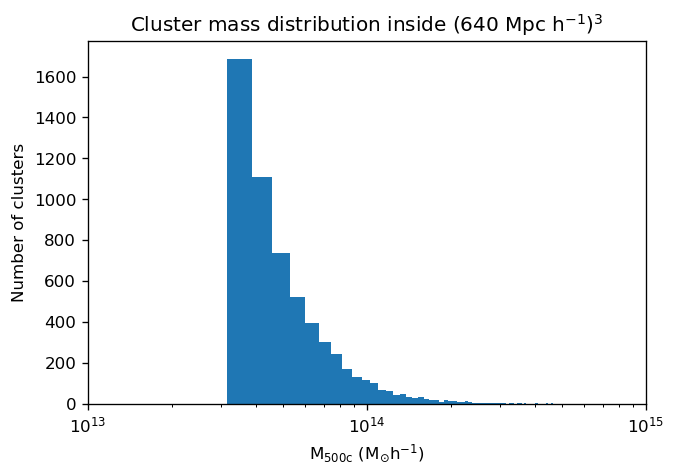

In [4]:
plt.figure(dpi = dpi)
plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = 100)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

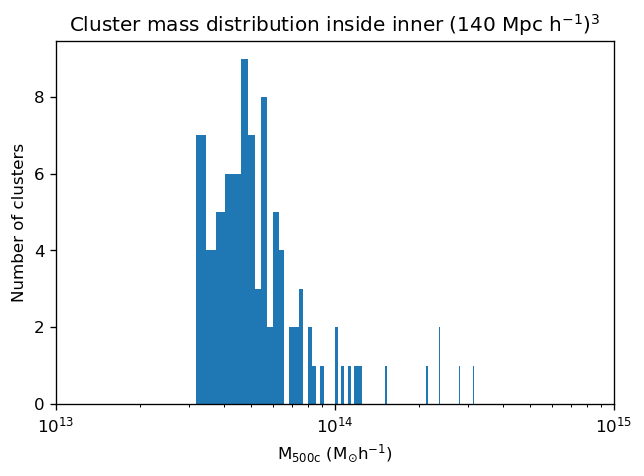

In [5]:
low_bound = 250000
upp_bound = 390000
df_clusters_inner = df_clusters_orig[(df_clusters_orig['x[kpc/h]'] > low_bound) & 
                               (df_clusters_orig['x[kpc/h]'] < upp_bound) &
                               (df_clusters_orig['y[kpc/h]'] > low_bound) & 
                               (df_clusters_orig['y[kpc/h]'] < upp_bound) & 
                               (df_clusters_orig['z[kpc/h]'] > low_bound) & 
                               (df_clusters_orig['z[kpc/h]'] < upp_bound)]
plt.figure(dpi = dpi)
plt.hist(df_clusters_inner['m500c[Msol/h]'],  bins = 100)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside inner (140 Mpc h$^{-1}$)$^3$');

In [66]:
df_clusters_inner.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,90.000000,90.000000,90.000000,9.000000e+01,90.000000,90.000000,90.000000
mean,327475.959556,327499.759889,307146.562667,6.898653e+13,115.082577,216.484800,-73.241142
std,43225.590387,43116.722874,42175.829596,5.180227e+13,299.183632,236.899501,246.527861
min,251476.330000,253901.440000,252956.950000,3.180670e+13,-997.993000,-245.123000,-734.910000
25%,291413.797500,283984.250000,267332.962500,4.325092e+13,-54.930100,55.315175,-179.257000
50%,332288.515000,336966.485000,302073.045000,5.268110e+13,154.554500,190.731000,-101.711000
75%,369537.700000,361592.177500,346525.680000,6.969482e+13,324.439250,403.463500,49.552425
max,389948.030000,389610.190000,387125.030000,3.145060e+14,789.958000,831.151000,900.098000


In [118]:
def bulk_velocity_with_radius_mass(df_clusters_inner):
    
    if len(df_clusters_inner) == 0:
        print('No cluster in this mass range.')
        return
    
    random_cluster = df_clusters_inner.sample(random_state = 0)

    max_extent = 250000

    df_clusters_cube = df_clusters_orig[
                        (df_clusters_orig['x[kpc/h]'] > (random_cluster['x[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_clusters_orig['x[kpc/h]'] < (random_cluster['x[kpc/h]'].iloc[0] + max_extent)) & 
                        (df_clusters_orig['y[kpc/h]'] > (random_cluster['y[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_clusters_orig['y[kpc/h]'] < (random_cluster['y[kpc/h]'].iloc[0] + max_extent)) & 
                        (df_clusters_orig['z[kpc/h]'] > (random_cluster['z[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_clusters_orig['z[kpc/h]'] < (random_cluster['z[kpc/h]'].iloc[0] + max_extent))
                                        ]
    
    df_clusters_cube.insert(3, 'x_shift[kpc/h]', df_clusters_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'].iloc[0])
    df_clusters_cube.insert(4, 'y_shift[kpc/h]', df_clusters_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'].iloc[0])
    df_clusters_cube.insert(5, 'z_shift[kpc/h]', df_clusters_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'].iloc[0])
    

    df_clusters_cube.insert(6, 'dist_from_clus', np.sqrt(df_clusters_cube['x_shift[kpc/h]']**2 + 
                                                         df_clusters_cube['y_shift[kpc/h]']**2 +
                                                         df_clusters_cube['z_shift[kpc/h]']**2))
    

    radi = np.arange(10000, 250001, 10000)
    v_bulk_x = np.zeros(radi.shape)
    v_bulk_y = np.zeros(radi.shape)
    v_bulk_z = np.zeros(radi.shape)
    
    no_cluster_rad_x = 0
    no_cluster_rad_y = 0
    no_cluster_rad_z = 0

    for i, r in enumerate(radi):

        df_clusters_sphere = df_clusters_cube[df_clusters_cube['dist_from_clus'] < r]

        if (np.sum(df_clusters_sphere['x_shift[kpc/h]'].abs()) == 0):
            v_bulk_x[i] = 0
            no_cluster_rad_x = r
        
        else:
#             v_bulk_x[i] = (np.sum(df_clusters_sphere['vx[km/s]'] * df_clusters_sphere['x_shift[kpc/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['x_shift[kpc/h]'].abs()))
#             v_bulk_x[i] = (np.sum(df_clusters_sphere['vx[km/s]'] * df_clusters_sphere['m500c[Msol/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['m500c[Msol/h]'].abs()))
            v_bulk_x[i] = (np.sum(df_clusters_sphere['vx[km/s]'] * df_clusters_sphere['m500c[Msol/h]'] * df_clusters_sphere['x_shift[kpc/h]'].abs()) / 
                           (np.sum(df_clusters_sphere['m500c[Msol/h]']) * np.sum(df_clusters_sphere['x_shift[kpc/h]'].abs())))
            
            
        if (np.sum(df_clusters_sphere['y_shift[kpc/h]'].abs()) == 0):
            v_bulk_y[i] = 0
            no_cluster_rad_y = r
        
        else:
#             v_bulk_y[i] = (np.sum(df_clusters_sphere['vy[km/s]'] * df_clusters_sphere['y_shift[kpc/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['y_shift[kpc/h]'].abs()))
#             v_bulk_y[i] = (np.sum(df_clusters_sphere['vy[km/s]'] * df_clusters_sphere['m500c[Msol/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['m500c[Msol/h]'].abs()))
            v_bulk_y[i] = (np.sum(df_clusters_sphere['vy[km/s]'] * df_clusters_sphere['m500c[Msol/h]'] * df_clusters_sphere['y_shift[kpc/h]'].abs()) / 
                           (np.sum(df_clusters_sphere['m500c[Msol/h]']) * np.sum(df_clusters_sphere['y_shift[kpc/h]'].abs())))
            
            
        if (np.sum(df_clusters_sphere['z_shift[kpc/h]'].abs()) == 0):
            v_bulk_z[i] = 0
            no_cluster_rad_z = r
        
        else:
#             v_bulk_z[i] = (np.sum(df_clusters_sphere['vz[km/s]'] * df_clusters_sphere['z_shift[kpc/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['z_shift[kpc/h]'].abs()))
#             v_bulk_z[i] = (np.sum(df_clusters_sphere['vz[km/s]'] * df_clusters_sphere['m500c[Msol/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['m500c[Msol/h]'].abs()))
            v_bulk_z[i] = (np.sum(df_clusters_sphere['vz[km/s]'] * df_clusters_sphere['m500c[Msol/h]'] * df_clusters_sphere['z_shift[kpc/h]'].abs()) / 
                           (np.sum(df_clusters_sphere['m500c[Msol/h]']) * np.sum(df_clusters_sphere['z_shift[kpc/h]'].abs())))
            
#             v_bulk_y[i] = abs(v_bulk_y[i])
    
    v_bulk_mag = np.sqrt(v_bulk_x**2 + v_bulk_y**2 + v_bulk_z**2)
    
    plt.figure(dpi = dpi)
    plt.plot(radi/1e3, v_bulk_x, label = 'v$\mathrm{_{bulk, x}}$')
    plt.plot(radi/1e3, v_bulk_y, label = 'v$\mathrm{_{bulk, y}}$')
    plt.plot(radi/1e3, v_bulk_z, label = 'v$\mathrm{_{bulk, z}}$')
    plt.plot(radi/1e3, v_bulk_mag, label = 'v$\mathrm{_{bulk, mag}}$')
    plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
    plt.ylabel('Bulk velocity (km/s)')
    plt.legend()
    
    if (no_cluster_rad_x > 0) or (no_cluster_rad_y > 0) or (no_cluster_rad_z > 0):
        plt.text(0.35, 0.2, f'No cluster inside inner {no_cluster_rad_x/1e3} (x), {no_cluster_rad_y/1e3} (y) & {no_cluster_rad_z/1e3} (z) Mpc/h', transform=plt.gca().transAxes, fontsize = 7)
        
    plt.text(0.35, 0.12, f'Bulk velocity magnitude inside 250 Mpc/h: {round(v_bulk_mag[-1], 1)} km/s', transform=plt.gca().transAxes, fontsize = 7)
    plt.title("Cluster M$_{500\mathrm{c}}$:" + " {:.2e} ".format(random_cluster['m500c[Msol/h]'].iloc[0]) + 'M$_{\odot}$h$^{-1}$' + "| Using radius & masses");

In [117]:
def bulk_velocity_with_radius(df_clusters_inner):
    
    if len(df_clusters_inner) == 0:
        print('No cluster in this mass range.')
        return
    
    random_cluster = df_clusters_inner.sample(random_state = 0)

    max_extent = 250000

    df_clusters_cube = df_clusters_orig[
                        (df_clusters_orig['x[kpc/h]'] > (random_cluster['x[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_clusters_orig['x[kpc/h]'] < (random_cluster['x[kpc/h]'].iloc[0] + max_extent)) & 
                        (df_clusters_orig['y[kpc/h]'] > (random_cluster['y[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_clusters_orig['y[kpc/h]'] < (random_cluster['y[kpc/h]'].iloc[0] + max_extent)) & 
                        (df_clusters_orig['z[kpc/h]'] > (random_cluster['z[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_clusters_orig['z[kpc/h]'] < (random_cluster['z[kpc/h]'].iloc[0] + max_extent))
                                        ]
    
    df_clusters_cube.insert(3, 'x_shift[kpc/h]', df_clusters_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'].iloc[0])
    df_clusters_cube.insert(4, 'y_shift[kpc/h]', df_clusters_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'].iloc[0])
    df_clusters_cube.insert(5, 'z_shift[kpc/h]', df_clusters_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'].iloc[0])
    

    df_clusters_cube.insert(6, 'dist_from_clus', np.sqrt(df_clusters_cube['x_shift[kpc/h]']**2 + 
                                                         df_clusters_cube['y_shift[kpc/h]']**2 +
                                                         df_clusters_cube['z_shift[kpc/h]']**2))
    

    radi = np.arange(10000, 250001, 10000)
    v_bulk_x = np.zeros(radi.shape)
    v_bulk_y = np.zeros(radi.shape)
    v_bulk_z = np.zeros(radi.shape)
    
    no_cluster_rad_x = 0
    no_cluster_rad_y = 0
    no_cluster_rad_z = 0

    for i, r in enumerate(radi):

        df_clusters_sphere = df_clusters_cube[df_clusters_cube['dist_from_clus'] < r]

        if (np.sum(df_clusters_sphere['x_shift[kpc/h]'].abs()) == 0):
            v_bulk_x[i] = 0
            no_cluster_rad_x = r
        
        else:
            v_bulk_x[i] = (np.sum(df_clusters_sphere['vx[km/s]'] * df_clusters_sphere['x_shift[kpc/h]'].abs()) / 
                           np.sum(df_clusters_sphere['x_shift[kpc/h]'].abs()))
#             v_bulk_x[i] = (np.sum(df_clusters_sphere['vx[km/s]'] * df_clusters_sphere['m500c[Msol/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['m500c[Msol/h]'].abs()))
#             v_bulk_x[i] = (np.sum(df_clusters_sphere['vx[km/s]'] * df_clusters_sphere['m500c[Msol/h]'] * df_clusters_sphere['x_shift[kpc/h]'].abs()) / 
#                            (np.sum(df_clusters_sphere['m500c[Msol/h]']) * np.sum(df_clusters_sphere['x_shift[kpc/h]'].abs())))
            
            
        if (np.sum(df_clusters_sphere['y_shift[kpc/h]'].abs()) == 0):
            v_bulk_y[i] = 0
            no_cluster_rad_y = r
        
        else:
            v_bulk_y[i] = (np.sum(df_clusters_sphere['vy[km/s]'] * df_clusters_sphere['y_shift[kpc/h]'].abs()) / 
                           np.sum(df_clusters_sphere['y_shift[kpc/h]'].abs()))
#             v_bulk_y[i] = (np.sum(df_clusters_sphere['vy[km/s]'] * df_clusters_sphere['m500c[Msol/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['m500c[Msol/h]'].abs()))
#             v_bulk_y[i] = (np.sum(df_clusters_sphere['vy[km/s]'] * df_clusters_sphere['m500c[Msol/h]'] * df_clusters_sphere['y_shift[kpc/h]'].abs()) / 
#                            (np.sum(df_clusters_sphere['m500c[Msol/h]']) * np.sum(df_clusters_sphere['y_shift[kpc/h]'].abs())))
            
            
        if (np.sum(df_clusters_sphere['z_shift[kpc/h]'].abs()) == 0):
            v_bulk_z[i] = 0
            no_cluster_rad_z = r
        
        else:
            v_bulk_z[i] = (np.sum(df_clusters_sphere['vz[km/s]'] * df_clusters_sphere['z_shift[kpc/h]'].abs()) / 
                           np.sum(df_clusters_sphere['z_shift[kpc/h]'].abs()))
#             v_bulk_z[i] = (np.sum(df_clusters_sphere['vz[km/s]'] * df_clusters_sphere['m500c[Msol/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['m500c[Msol/h]'].abs()))
#             v_bulk_z[i] = (np.sum(df_clusters_sphere['vz[km/s]'] * df_clusters_sphere['m500c[Msol/h]'] * df_clusters_sphere['z_shift[kpc/h]'].abs()) / 
#                            (np.sum(df_clusters_sphere['m500c[Msol/h]']) * np.sum(df_clusters_sphere['z_shift[kpc/h]'].abs())))
            
#             v_bulk_y[i] = abs(v_bulk_y[i])
    
    v_bulk_mag = np.sqrt(v_bulk_x**2 + v_bulk_y**2 + v_bulk_z**2)
    
    plt.figure(dpi = dpi)
    plt.plot(radi/1e3, v_bulk_x, label = 'v$\mathrm{_{bulk, x}}$')
    plt.plot(radi/1e3, v_bulk_y, label = 'v$\mathrm{_{bulk, y}}$')
    plt.plot(radi/1e3, v_bulk_z, label = 'v$\mathrm{_{bulk, z}}$')
    plt.plot(radi/1e3, v_bulk_mag, label = 'v$\mathrm{_{bulk, mag}}$')
    plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
    plt.ylabel('Bulk velocity (km/s)')
    plt.legend()
    
    if (no_cluster_rad_x > 0) or (no_cluster_rad_y > 0) or (no_cluster_rad_z > 0):
        plt.text(0.35, 0.2, f'No cluster inside inner {no_cluster_rad_x/1e3} (x), {no_cluster_rad_y/1e3} (y) & {no_cluster_rad_z/1e3} (z) Mpc/h', transform=plt.gca().transAxes, fontsize = 7)
        
    plt.text(0.35, 0.12, f'Bulk velocity magnitude inside 250 Mpc/h: {round(v_bulk_mag[-1], 1)} km/s', transform=plt.gca().transAxes, fontsize = 7)
    plt.title("Cluster M$_{500\mathrm{c}}$:" + " {:.2e} ".format(random_cluster['m500c[Msol/h]'].iloc[0]) + 'M$_{\odot}$h$^{-1}$' + "| Using radii");

In [135]:
def bulk_velocity_with_mass(df_clusters_inner):
    
    if len(df_clusters_inner) == 0:
        print('No cluster in this mass range.')
        return
    
    random_cluster = df_clusters_inner.sample(random_state = 0)

    max_extent = 250000

    df_clusters_cube = df_clusters_orig[
                        (df_clusters_orig['x[kpc/h]'] > (random_cluster['x[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_clusters_orig['x[kpc/h]'] < (random_cluster['x[kpc/h]'].iloc[0] + max_extent)) & 
                        (df_clusters_orig['y[kpc/h]'] > (random_cluster['y[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_clusters_orig['y[kpc/h]'] < (random_cluster['y[kpc/h]'].iloc[0] + max_extent)) & 
                        (df_clusters_orig['z[kpc/h]'] > (random_cluster['z[kpc/h]'].iloc[0] - max_extent)) & 
                        (df_clusters_orig['z[kpc/h]'] < (random_cluster['z[kpc/h]'].iloc[0] + max_extent))
                                        ]
    
    df_clusters_cube.insert(3, 'x_shift[kpc/h]', df_clusters_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'].iloc[0])
    df_clusters_cube.insert(4, 'y_shift[kpc/h]', df_clusters_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'].iloc[0])
    df_clusters_cube.insert(5, 'z_shift[kpc/h]', df_clusters_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'].iloc[0])
    

    df_clusters_cube.insert(6, 'dist_from_clus', np.sqrt(df_clusters_cube['x_shift[kpc/h]']**2 + 
                                                         df_clusters_cube['y_shift[kpc/h]']**2 +
                                                         df_clusters_cube['z_shift[kpc/h]']**2))
    

    radi = np.arange(0, 250001, 10000)
    radi[0] = 0
    v_bulk_x = np.zeros(radi.shape)
    v_bulk_y = np.zeros(radi.shape)
    v_bulk_z = np.zeros(radi.shape)
    
    no_cluster_rad_x = 0
    no_cluster_rad_y = 0
    no_cluster_rad_z = 0

    for i, r in enumerate(radi):

        df_clusters_sphere = df_clusters_cube[df_clusters_cube['dist_from_clus'] <= r]

        if (np.sum(df_clusters_sphere['x_shift[kpc/h]'].abs()) == 0):
            v_bulk_x[i] = 0
            no_cluster_rad_x = r
        
        else:
#             v_bulk_x[i] = (np.sum(df_clusters_sphere['vx[km/s]'] * df_clusters_sphere['x_shift[kpc/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['x_shift[kpc/h]'].abs()))
            v_bulk_x[i] = (np.sum(df_clusters_sphere['vx[km/s]'] * df_clusters_sphere['m500c[Msol/h]'].abs()) / 
                           np.sum(df_clusters_sphere['m500c[Msol/h]'].abs()))
#             v_bulk_x[i] = (np.sum(df_clusters_sphere['vx[km/s]'] * df_clusters_sphere['m500c[Msol/h]'] * df_clusters_sphere['x_shift[kpc/h]'].abs()) / 
#                            (np.sum(df_clusters_sphere['m500c[Msol/h]']) * np.sum(df_clusters_sphere['x_shift[kpc/h]'].abs())))
            
            
        if (np.sum(df_clusters_sphere['y_shift[kpc/h]'].abs()) == 0):
            v_bulk_y[i] = 0
            no_cluster_rad_y = r
        
        else:
#             v_bulk_y[i] = (np.sum(df_clusters_sphere['vy[km/s]'] * df_clusters_sphere['y_shift[kpc/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['y_shift[kpc/h]'].abs()))
            v_bulk_y[i] = (np.sum(df_clusters_sphere['vy[km/s]'] * df_clusters_sphere['m500c[Msol/h]'].abs()) / 
                           np.sum(df_clusters_sphere['m500c[Msol/h]'].abs()))
#             v_bulk_y[i] = (np.sum(df_clusters_sphere['vy[km/s]'] * df_clusters_sphere['m500c[Msol/h]'] * df_clusters_sphere['y_shift[kpc/h]'].abs()) / 
#                            (np.sum(df_clusters_sphere['m500c[Msol/h]']) * np.sum(df_clusters_sphere['y_shift[kpc/h]'].abs())))
            
            
        if (np.sum(df_clusters_sphere['z_shift[kpc/h]'].abs()) == 0):
#             v_bulk_z[i] = 0
            no_cluster_rad_z = r
        
#         else:
#             v_bulk_z[i] = (np.sum(df_clusters_sphere['vz[km/s]'] * df_clusters_sphere['z_shift[kpc/h]'].abs()) / 
#                            np.sum(df_clusters_sphere['z_shift[kpc/h]'].abs()))
        v_bulk_z[i] = (np.sum(df_clusters_sphere['vz[km/s]'] * df_clusters_sphere['m500c[Msol/h]'].abs()) / 
                           np.sum(df_clusters_sphere['m500c[Msol/h]'].abs()))
#             v_bulk_z[i] = (np.sum(df_clusters_sphere['vz[km/s]'] * df_clusters_sphere['m500c[Msol/h]'] * df_clusters_sphere['z_shift[kpc/h]'].abs()) / 
#                            (np.sum(df_clusters_sphere['m500c[Msol/h]']) * np.sum(df_clusters_sphere['z_shift[kpc/h]'].abs())))
            
#             v_bulk_y[i] = abs(v_bulk_y[i])
    
    v_bulk_mag = np.sqrt(v_bulk_x**2 + v_bulk_y**2 + v_bulk_z**2)
    
    plt.figure(dpi = dpi)
    plt.plot(radi/1e3, v_bulk_x, label = 'v$\mathrm{_{bulk, x}}$')
    plt.plot(radi/1e3, v_bulk_y, label = 'v$\mathrm{_{bulk, y}}$')
    plt.plot(radi/1e3, v_bulk_z, label = 'v$\mathrm{_{bulk, z}}$')
    plt.plot(radi/1e3, v_bulk_mag, label = 'v$\mathrm{_{bulk, mag}}$')
    plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
    plt.ylabel('Bulk velocity (km/s)')
    plt.legend()
    
    if (no_cluster_rad_x > 0) or (no_cluster_rad_y > 0) or (no_cluster_rad_z > 0):
        plt.text(0.35, 0.2, f'No cluster inside inner {no_cluster_rad_x/1e3} (x), {no_cluster_rad_y/1e3} (y) & {no_cluster_rad_z/1e3} (z) Mpc/h', transform=plt.gca().transAxes, fontsize = 7)
        
    plt.text(0.35, 0.12, f'Bulk velocity magnitude inside 250 Mpc/h: {round(v_bulk_mag[-1], 1)} km/s', transform=plt.gca().transAxes, fontsize = 7)
    plt.title("Cluster M$_{500\mathrm{c}}$:" + " {:.2e} ".format(random_cluster['m500c[Msol/h]'].iloc[0]) + 'M$_{\odot}$h$^{-1}$' + "| Using masses");

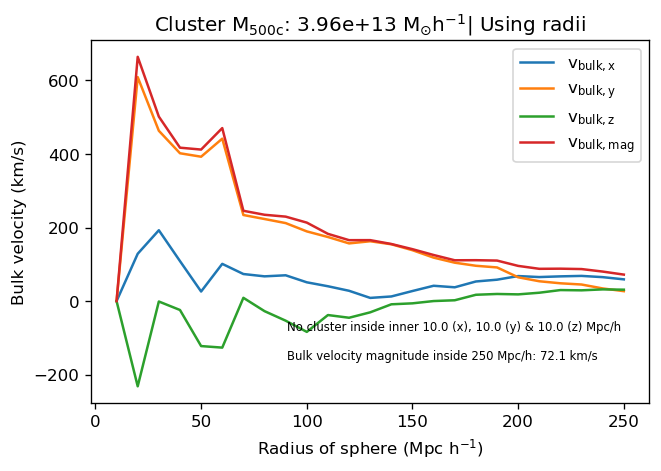

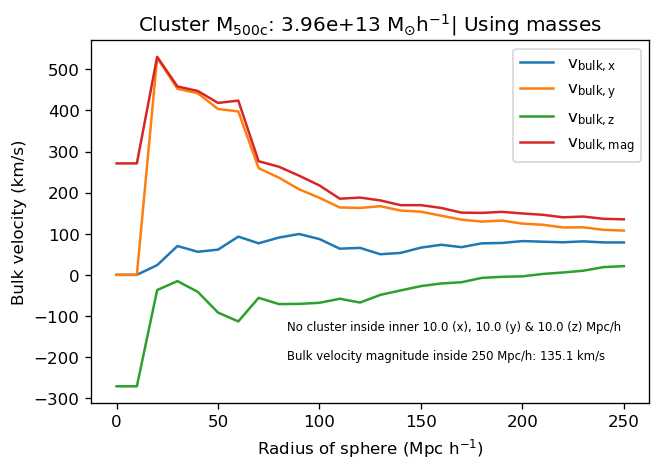

In [140]:
# bulk_velocity_with_radius_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 3e13) & 
#                                 (df_clusters_inner['m500c[Msol/h]'] < 5e13)])
bulk_velocity_with_radius(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 3e13) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 5e13)])
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 3e13) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 5e13)])


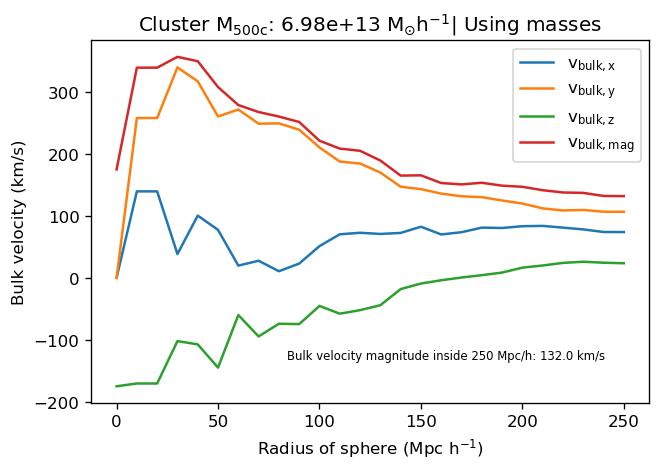

In [137]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 5e13) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 7e13)])

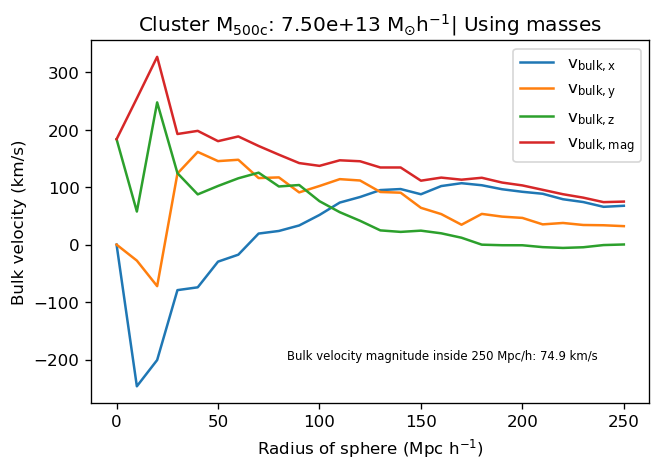

In [138]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 7e13) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 9e13)])

In [126]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 9e13) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 1e14)])

No cluster in this mass range.


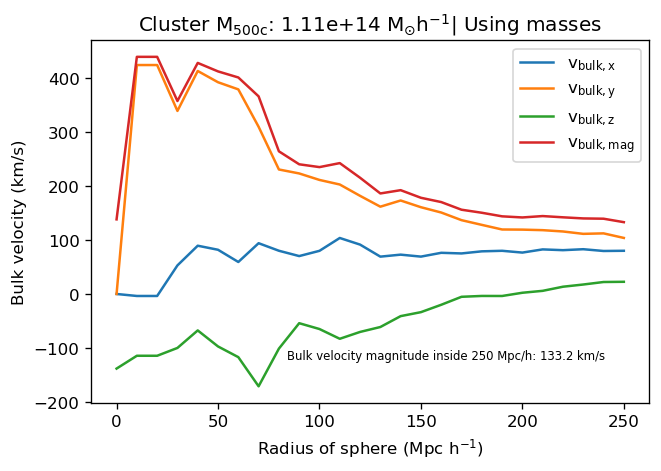

In [139]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 1e14) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 3e14)])

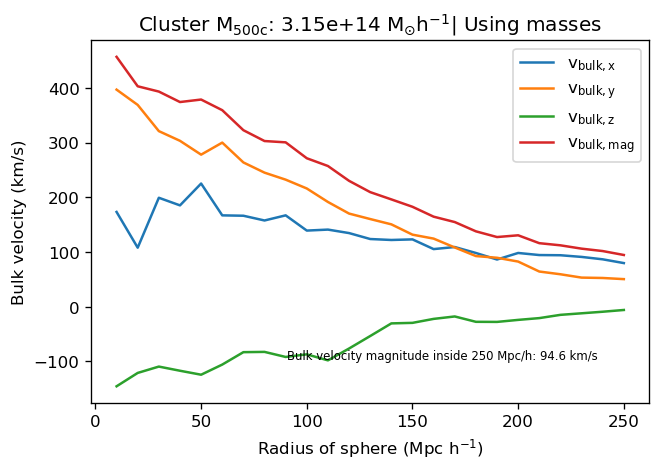

In [128]:
bulk_velocity_with_mass(df_clusters_inner[(df_clusters_inner['m500c[Msol/h]'] > 3e14) & 
                                (df_clusters_inner['m500c[Msol/h]'] < 5e14)])